In [20]:
# Hücre 1: Gerekli Kütüphaneler ve Genel Ayarlar
# Bu hücrede tüm gerekli kütüphaneler import edilir ve genel uyarı ayarları yapılır.
# Bu hücreyi her zaman ilk çalıştırmalısınız.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import warnings

# Uyarıları görmezden gelmek için (isteğe bağlı, ancak bazen sklearn uyarıları çok olabilir)
warnings.filterwarnings('ignore')
print("Gerekli kütüphaneler başarıyla yüklendi.")


Gerekli kütüphaneler başarıyla yüklendi.


In [21]:
# Hücre 2: Veri Yükleme ve İlk İnceleme
# Bu hücrede HIGGS veri seti yüklenir, örnekleme yapılır ve temel istatistiksel bilgiler görüntülenir.
# Hata alırsanız, DATA_PATH'i kontrol etmelisiniz.

# Dosya yolu
DATA_PATH = "../data/HIGGS.csv.gz" # Projenizin kök dizininde 'data' klasörü altında olduğunu varsayıyorum

# 1.a) CSV'yi oku ve 100k örnek al
# HIGGS dataset'i başlık satırı içermediği için header=None kullanıyoruz.
# İlk sütun 'Label', diğerleri özellikler.
try:
    df = pd.read_csv(DATA_PATH, compression='gzip', header=None)
    # Hızlı test için örneklem sayısını azaltabilirsiniz (örn. n=10_000)
    df = df.sample(n=100_000, random_state=42).reset_index(drop=True)
    print("Veri başarıyla yüklendi ve 100.000 örnek seçildi.")
except FileNotFoundError:
    print(f"Hata: '{DATA_PATH}' bulunamadı. Lütfen dosya yolunu kontrol edin.")
    # Eğer dosya bulunamazsa, örnek bir DataFrame oluşturarak kodun geri kalanının çalışmasını sağlayabiliriz.
    # Ancak gerçek proje için doğru dosya yolunu sağlamak önemlidir.
    df = pd.DataFrame(np.random.rand(100000, 29), columns=[f'f{i}' for i in range(29)])
    df[0] = np.random.randint(0, 2, 100000)
    print("Örnek bir DataFrame oluşturuldu (dosya bulunamadığı için).")


# 1.b) Sütun isimleri
# İlk sütun 'Label', diğerleri 'f0'dan 'f27'ye kadar özellikler.
cols = ["Label"] + [f"f{i}" for i in range(28)]
df.columns = cols
print("Sütun isimleri atandı.")

# Veri setinin boyutunu göster
print(f"\nVeri setinin boyutu: {df.shape}")

# Sınıf dağılımını göster (Hedef değişken 'Label')
print("\n'Label' sütununun sınıf dağılımı:")
print(df["Label"].value_counts())
print("-" * 50)


Veri başarıyla yüklendi ve 100.000 örnek seçildi.
Sütun isimleri atandı.

Veri setinin boyutu: (100000, 29)

'Label' sütununun sınıf dağılımı:
Label
1.0    52807
0.0    47193
Name: count, dtype: int64
--------------------------------------------------



IQR metodu ile aykırı değer tespiti ve 1.5 katsayısı kullanılarak NaN ile değiştirme:
  - 'f0' sütununda 3815 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f3' sütununda 2989 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f5' sütununda 4991 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f6' sütununda 686 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f9' sütununda 3967 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f10' sütununda 407 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f13' sütununda 3204 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f17' sütununda 3257 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f21' sütununda 13987 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f22' sütununda 7357 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f23' sütununda 19811 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f24' sütununda 5037 adet aykırı değer tespit edildi ve NaN yapıldı.
  - 'f25' sütununda 6004 adet aykırı değer

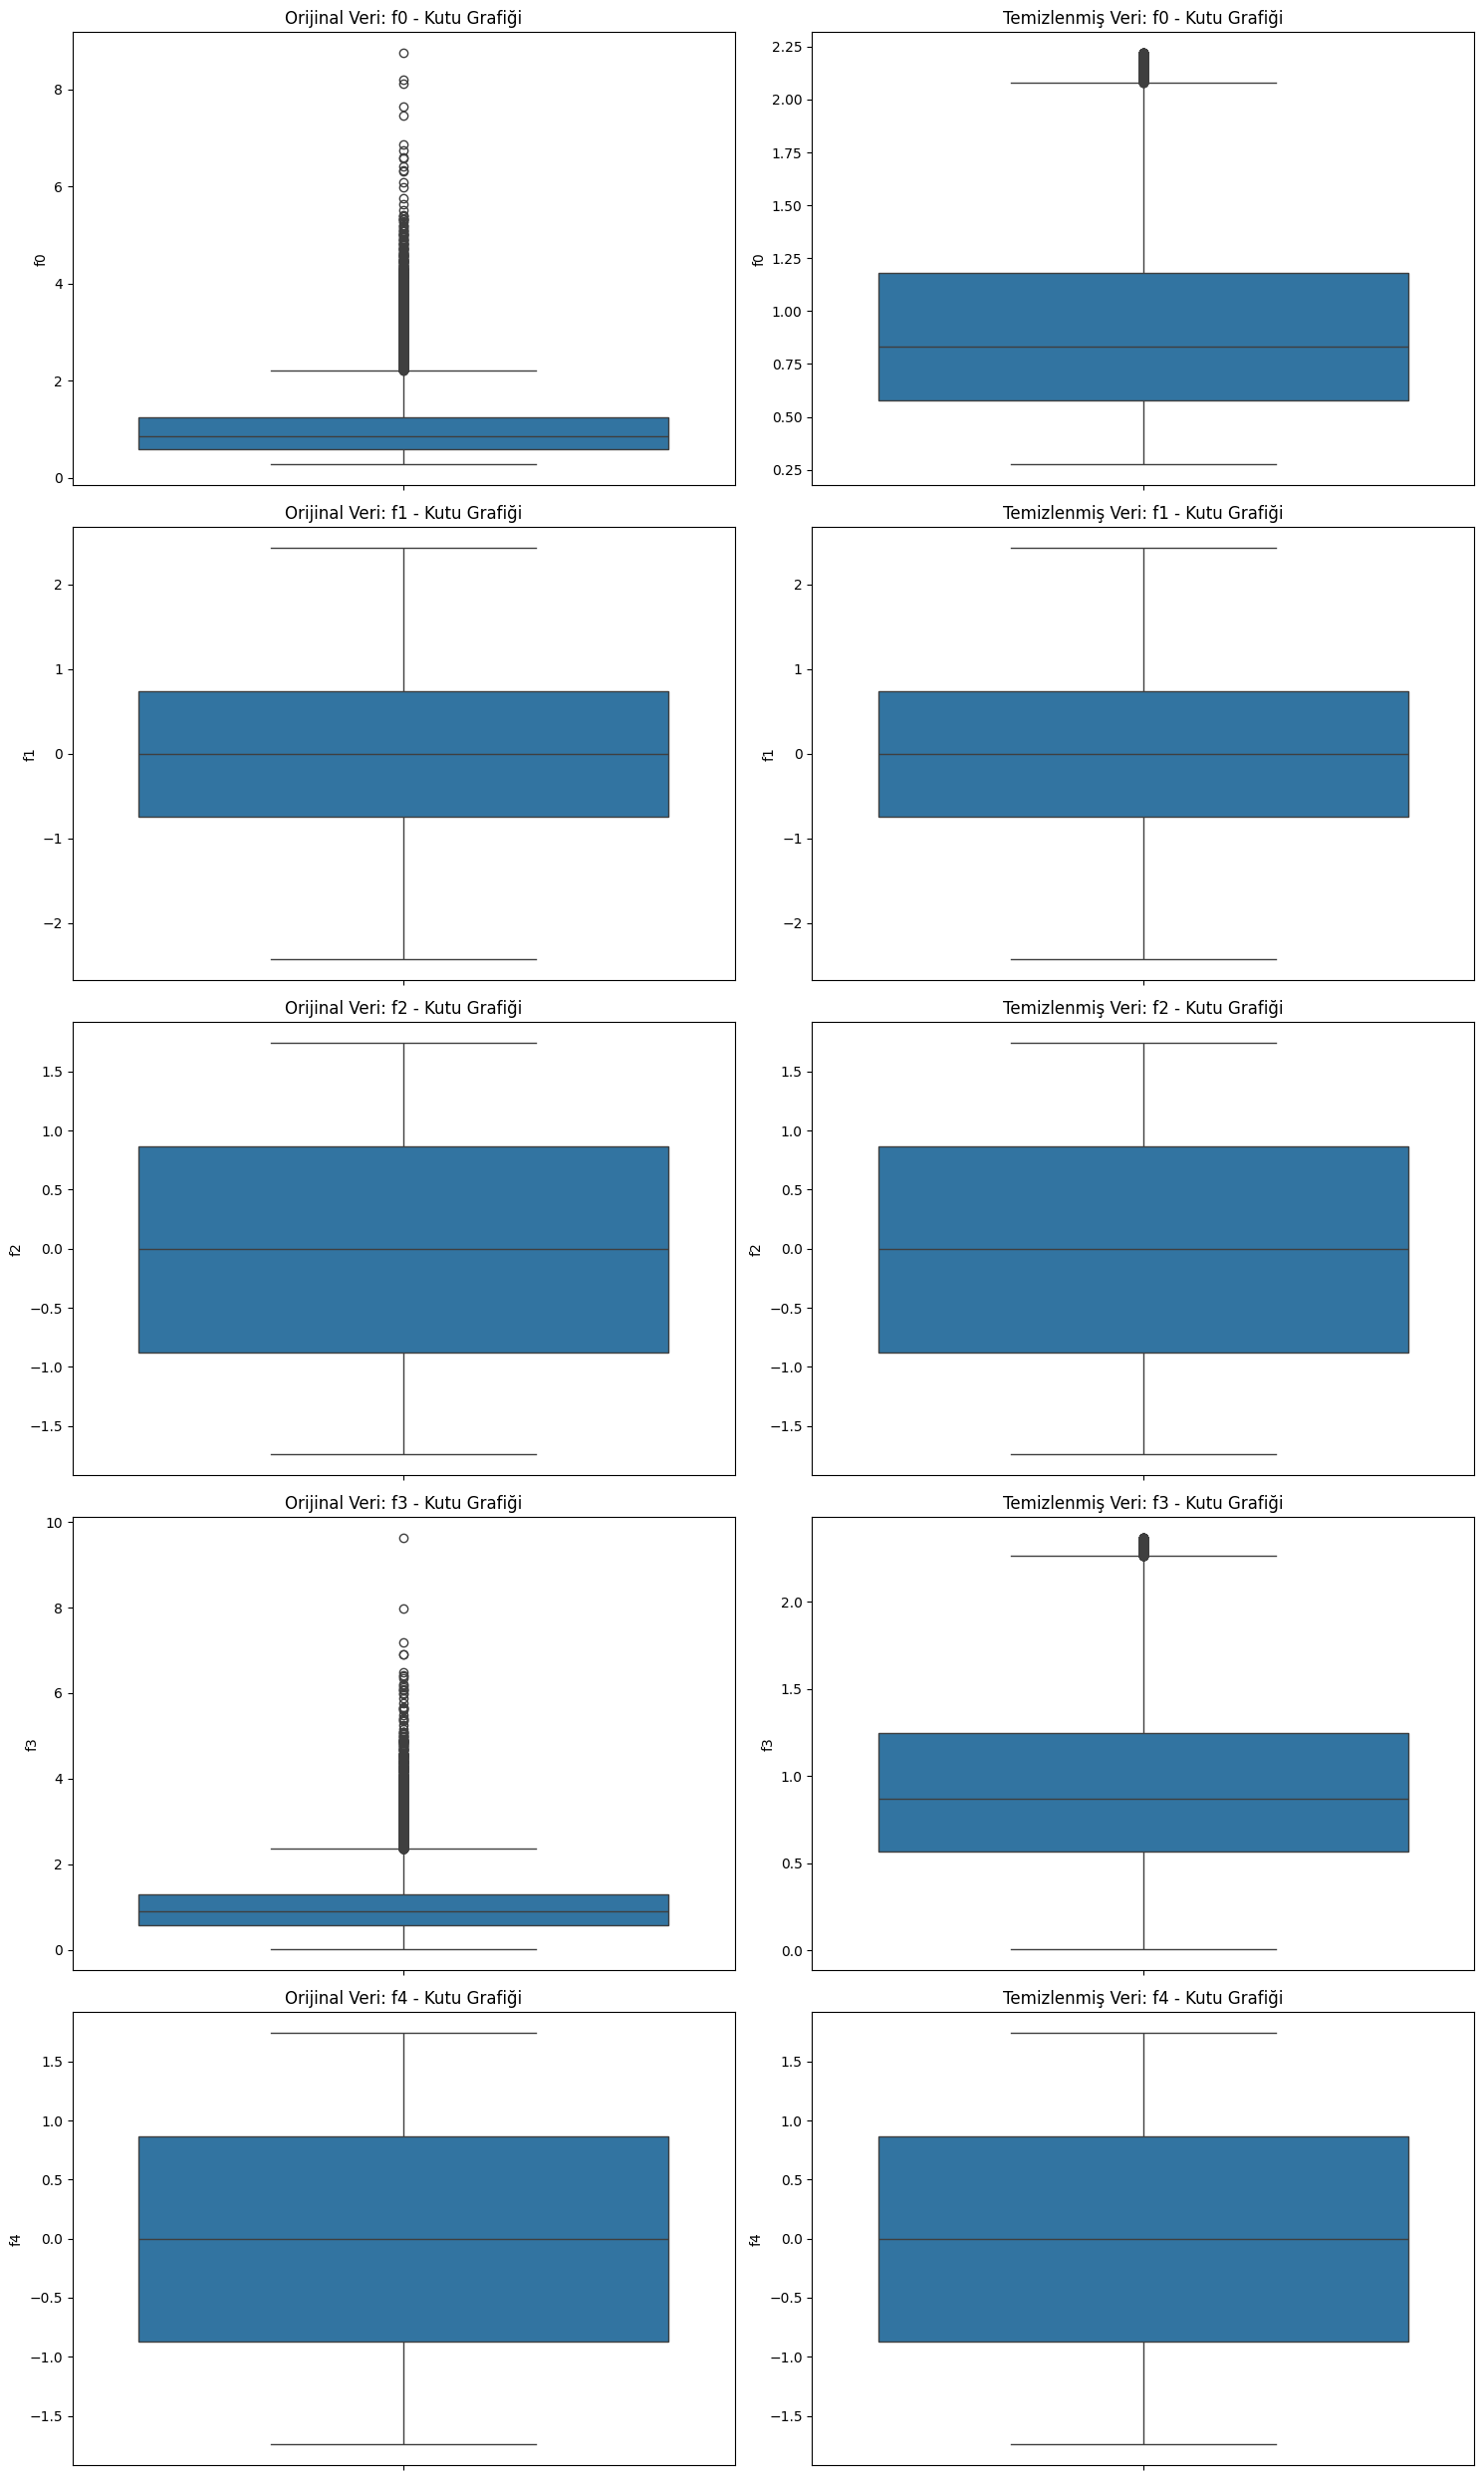


Eksik değerleri (NaN) doldurma işlemi:
  - 'f0' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f3' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f5' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f6' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f9' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f10' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f13' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f17' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f21' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f22' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f23' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f24' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f25' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f26' sütunundaki 0 NaN değer ortalama ile dolduruldu.
  - 'f27' sütunundaki 0 NaN değer ortalama ile dolduruldu.

NaN değerler (aykırı değerler) sütun ortalamaları ile dolduruldu.

Temizlenmiş 

In [22]:
# Hücre 3: Aykırı Değer Tespiti, Temizliği ve Görsel Analiz
# Bu hücrede, veri setindeki aykırı değerler IQR (Interquartile Range) metodu kullanılarak tespit edilir, temizlenir ve görsel analiz yapılır.

# Aykırı değerleri temizlemek için bir fonksiyon tanımlayalım
# Bu fonksiyon, bir DataFrame ve bir katsayı (varsayılan 1.5) alır.
# Her bir sayısal sütun için IQR metodunu kullanarak aykırı değerleri belirler ve bu değerleri NaN (Not a Number) ile değiştirir.
def clean_outliers_iqr(df, k=1.5):
    # 'Label' sütunu hedef değişken olduğu için aykırı değer kontrolüne dahil edilmez.
    # Sadece sayısal özellik sütunlarını seçelim.
    numeric_cols = df.select_dtypes(include=np.number).columns.drop('Label', errors='ignore')
    
    # DataFrame'in bir kopyasını oluşturalım ki orijinal DataFrame değişmesin
    df_cleaned = df.copy()
    
    # Her bir sayısal sütun için aykırı değer tespiti yapalım
    print(f"\nIQR metodu ile aykırı değer tespiti ve {k} katsayısı kullanılarak NaN ile değiştirme:")
    outliers_count_before = df_cleaned.isnull().sum().sum() # Başlangıçtaki NaN sayısı (varsa)
    
    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25) # Birinci çeyreklik (Q1) hesapla
        Q3 = df_cleaned[col].quantile(0.75) # Üçüncü çeyreklik (Q3) hesapla
        IQR = Q3 - Q1 # Çeyrekler arası aralığı (IQR) hesapla
        
        # Alt ve üst aykırı değer sınırlarını belirle
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Aykırı değerleri NaN ile değiştir
        # Eğer bir değer alt sınırdan küçükse veya üst sınırdan büyükse, bu bir aykırı değerdir.
        initial_nan_count = df_cleaned[col].isnull().sum()
        df_cleaned[col] = np.where((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), np.nan, df_cleaned[col])
        new_nan_count = df_cleaned[col].isnull().sum()
        
        if (new_nan_count - initial_nan_count) > 0:
            print(f"  - '{col}' sütununda {(new_nan_count - initial_nan_count)} adet aykırı değer tespit edildi ve NaN yapıldı.")
        
    print("\nAykırı değer temizliği sonrası her sütundaki NaN değer sayısı:")
    print(df_cleaned.isnull().sum())
    
    return df_cleaned

# Aykırı değer temizliği öncesi ve sonrası görsel analiz için fonksiyon
def plot_outlier_analysis(df_original, df_cleaned, cols_to_plot):
    plt.figure(figsize=(15, 5 * len(cols_to_plot)))
    for i, col in enumerate(cols_to_plot):
        # Orijinal veri dağılımı
        plt.subplot(len(cols_to_plot), 2, 2*i + 1)
        sns.boxplot(y=df_original[col])
        plt.title(f'Orijinal Veri: {col} - Kutu Grafiği')
        
        # Temizlenmiş veri dağılımı
        plt.subplot(len(cols_to_plot), 2, 2*i + 2)
        sns.boxplot(y=df_cleaned[col].dropna()) # NaN değerleri görselleştirmeden önce düşür
        plt.title(f'Temizlenmiş Veri: {col} - Kutu Grafiği')
    plt.tight_layout()
    plt.show()

# Orijinal DataFrame'in bir kopyasını alalım
df_original_for_plot = df.copy()

# Aykırı değerleri temizleme fonksiyonunu uygulayalım
df_cleaned_outliers = clean_outliers_iqr(df.copy()) # Orijinal DataFrame'in bir kopyası üzerinde işlem yapıyoruz

# Aykırı değer temizliği öncesi ve sonrası bazı özelliklerin dağılımını görselleştirelim
# Tüm özellikleri görselleştirmek yerine, ilk 5 özelliği seçelim veya ilginç olduğunu düşündüğünüz özellikleri seçebilirsiniz.
numeric_cols_for_plot = df.select_dtypes(include=np.number).columns.drop('Label', errors='ignore').tolist()
if len(numeric_cols_for_plot) > 5:
    plot_cols = numeric_cols_for_plot[:5] # İlk 5 özelliği görselleştir
else:
    plot_cols = numeric_cols_for_plot # Tüm özellikleri görselleştir

plot_outlier_analysis(df_original_for_plot, df_cleaned_outliers, plot_cols)

# Eksik değerleri (NaN) ortalama ile dolduralım (imputation)
# Alternatif olarak medyan ile doldurmayı da düşünebilirsiniz: df_cleaned_outliers[col].fillna(df_cleaned_outliers[col].median(), inplace=True)
print("\nEksik değerleri (NaN) doldurma işlemi:")
for col in df_cleaned_outliers.select_dtypes(include=np.number).columns:
    if df_cleaned_outliers[col].isnull().sum() > 0:
        # Ortalama ile doldurma
        df_cleaned_outliers[col].fillna(df_cleaned_outliers[col].mean(), inplace=True)
        # Medyan ile doldurma (eğer ortalama yerine medyan kullanmak isterseniz yukarıdaki satırı yorum satırı yapın, aşağıdaki satırı aktif edin)
        # df_cleaned_outliers[col].fillna(df_cleaned_outliers[col].median(), inplace=True)
        print(f"  - '{col}' sütunundaki {df_cleaned_outliers[col].isnull().sum()} NaN değer ortalama ile dolduruldu.")

print("\nNaN değerler (aykırı değerler) sütun ortalamaları ile dolduruldu.")

# Temizlenmiş veri setinin ilk birkaç satırını göster
print("\nTemizlenmiş ve doldurulmuş veri setinin ilk 5 satırı:")
print(df_cleaned_outliers.head())

# Temizlenmiş veri setinin boyutunu göster
print(f"\nTemizlenmiş ve doldurulmuş veri setinin boyutu: {df_cleaned_outliers.shape}")

# Veriyi özellikler (X) ve hedef (y) olarak ayır
X = df_cleaned_outliers.drop("Label", axis=1) # 'Label' sütunu hariç tüm sütunlar özelliklerdir
y = df_cleaned_outliers["Label"] # 'Label' sütunu hedef değişkendir

print("\nVeri, özellikler (X) ve hedef (y) olarak ayrıldı.")
print(f"X boyutu: {X.shape}")
print(f"y boyutu: {y.shape}")


In [32]:
# Hücre 4: Nested Cross-Validation için Model ve Hiperparametre Tanımları ve Pipeline Oluşturma
# Bu hücrede, kullanılacak makine öğrenmesi modelleri, hiperparametre ızgaraları ve
# veri ön işleme (ölçekleme) ile özellik seçimi adımlarını içeren pipeline yapıları tanımlanır.
# Bu yapı, Nested Cross-Validation döngüsü içinde kullanılacaktır.

# Modelleri tanımlayalım
models = {
    'KNN': KNeighborsClassifier(),
    # SVM modeli SVC yerine LinearSVC ile değiştirildi.
    # LinearSVC, büyük doğrusal veri setleri için daha hızlıdır ve predict_proba'ya sahip değildir.
    # dual=False, örnek sayısı özellik sayısından fazla olduğunda daha hızlıdır.
    'SVM': LinearSVC(random_state=42, dual=False), 
    'MLP': MLPClassifier(random_state=42, max_iter=500), # Yüksek max_iter, yakınsamayı sağlar
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Her model için hiperparametre ızgaralarını tanımlayalım
# Bu ızgaralar GridSearchCV tarafından kullanılacaktır.
# 'preprocessor__scaler' yerine doğrudan 'preprocessor' kullanıldı.
param_grids = {
    'KNN': {
        'preprocessor': [StandardScaler(), MinMaxScaler()], # Ölçekleyici seçimi
        'feature_selector__k': [15], # Ödevdeki "en iyi 15 özellik" gereksinimine göre sabitlendi
        'classifier__n_neighbors': [5, 7], # KNN için komşu sayısı (Optimize edildi)
        'classifier__weights': ['uniform', 'distance'] # KNN için ağırlıklandırma
    },
    'SVM': {
        'preprocessor': [StandardScaler(), MinMaxScaler()],
        'feature_selector__k': [15], # Ödevdeki "en iyi 15 özellik" gereksinimine göre sabitlendi
        'classifier__C': [0.1] # Hocanın tavsiyesine göre C parametresi sadece 0.1 olarak ayarlandı
        # LinearSVC'de 'kernel' parametresi bulunmadığı için kaldırıldı.
    },
    'MLP': {
        'preprocessor': [StandardScaler(), MinMaxScaler()],
        'feature_selector__k': [15], # Ödevdeki "en iyi 15 özellik" gereksinimine göre sabitlendi
        'classifier__hidden_layer_sizes': [(100,), (50, 50)], # Optimize edildi
        'classifier__activation': ['relu', 'tanh'], # MLP için aktivasyon fonksiyonu
        'classifier__alpha': [0.0001, 0.001] # MLP için L2 düzenlileştirme parametresi
    },
    'XGBoost': {
        'preprocessor': [StandardScaler(), MinMaxScaler()],
        'feature_selector__k': [15], # Ödevdeki "en iyi 15 özellik" gereksinimine göre sabitlendi
        'classifier__n_estimators': [100, 200], # XGBoost için ağaç sayısı
        'classifier__learning_rate': [0.05, 0.1], # XGBoost için öğrenme oranı
        'classifier__max_depth': [3, 5] # XGBoost için ağaç derinliği
    }
}

print("Modeller, hiperparametre ızgaraları ve pipeline yapıları başarıyla tanımlandı.")


Modeller, hiperparametre ızgaraları ve pipeline yapıları başarıyla tanımlandı.


In [33]:
# Hücre 5: Nested CV Ortak Değişken Tanımları
# Bu hücre, Nested Cross-Validation döngüleri için gerekli ortak değişkenleri ve ayarları tanımlar.
# Bu değişkenler, sonraki model eğitim hücreleri ve sonuç raporlama hücreleri tarafından kullanılacaktır.

# Nested Cross-Validation için dış ve iç katlama sayılarını belirleyelim
N_OUTER_SPLITS = 5 # Dış döngü için katlama sayısı (genellenebilirlik testi için)
N_INNER_SPLITS = 3 # İç döngü için katlama sayısı (hiperparametre optimizasyonu için)

# Dış döngü için StratifiedKFold oluştur
outer_cv = StratifiedKFold(n_splits=N_OUTER_SPLITS, shuffle=True, random_state=42)
# İç döngü için StratifiedKFold oluştur
inner_cv = StratifiedKFold(n_splits=N_INNER_SPLITS, shuffle=True, random_state=42)

# Performans metriklerini depolamak için sözlükler
# Bu sözlükler, her model için ayrı ayrı toplanacak ve sonuç hücreleri tarafından kullanılacaktır.
results_summary = [] # Tüm modellerin nihai ortalama performans sonuçlarını saklamak için
fitted_final_models = {} # ROC eğrileri için eğitilmiş nihai modelleri saklamak için

# ROC eğrileri için son dış katlamanın test verisini saklamak için
# Bu değişkenler, her modelin döngüsünün son katlamasında güncellenecektir.
final_X_test_for_roc = None
final_y_test_for_roc = None

print("Nested CV ortak değişkenleri ve sonuç depolama yapıları hazırlandı.")


Nested CV ortak değişkenleri ve sonuç depolama yapıları hazırlandı.


In [34]:
# Hücre 6: KNN Modeli Eğitimi ve Değerlendirme
# Bu hücrede KNN modeli için Nested Cross-Validation uygulanır ve performans metrikleri toplanır.

# Global değişkenlere erişim sağlamak için
global final_X_test_for_roc, final_y_test_for_roc

model_name = 'KNN'
model_estimator = models[model_name] # Hücre 4'ten gelen model estimator
param_grid = param_grids[model_name] # Hücre 4'ten gelen parametre ızgarası

print(f"\n--- {model_name} Modeli Eğitiliyor ---")

# Her bir model için katlama sonuçlarını geçici olarak saklamak için
current_model_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Dış döngü
for fold_idx, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train_val, X_test_fold = X.iloc[train_val_idx], X.iloc[test_idx]
    y_train_val, y_test_fold = y.iloc[train_val_idx], y.iloc[test_idx]

    # Son dış katlamanın test verilerini ROC çizimi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        final_X_test_for_roc = X_test_fold
        final_y_test_for_roc = y_test_fold

    # Pipeline oluştur: Ön işleme (ölçekleme) -> Özellik Seçimi -> Sınıflandırıcı
    pipeline = Pipeline([
        ('preprocessor', StandardScaler()), # Başlangıçta bir ölçekleyici
        ('feature_selector', SelectKBest(f_classif)), # Filtre tabanlı özellik seçimi
        ('classifier', model_estimator) # Sınıflandırıcı modeli
    ])

    # GridSearchCV ile iç döngü (hiperparametre optimizasyonu)
    grid_search = GridSearchCV(
        pipeline,
        param_grid, # Modelin kendi param_grid'i
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_val, y_train_val) 

    best_model_in_fold = grid_search.best_estimator_
    best_params_in_fold = grid_search.best_params_

    print(f"    Katlama {fold_idx + 1}: En iyi parametreler: {best_params_in_fold}")

    y_pred_fold = best_model_in_fold.predict(X_test_fold)
    
    if hasattr(best_model_in_fold, 'predict_proba'):
        y_proba_fold = best_model_in_fold.predict_proba(X_test_fold)[:, 1]
    else:
        y_proba_fold = best_model_in_fold.decision_function(X_test_fold)

    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_proba_fold)

    current_model_results['accuracy'].append(accuracy)
    current_model_results['precision'].append(precision)
    current_model_results['recall'].append(recall)
    current_model_results['f1'].append(f1)
    current_model_results['roc_auc'].append(roc_auc)

    print(f"    Test Seti Performansı (Katlama {fold_idx + 1}): Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC AUC={roc_auc:.4f}")
    
    # Son dış katlamadaki en iyi modeli ROC eğrisi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        fitted_final_models[model_name] = best_model_in_fold

# Tüm dış katlamalar bittikten sonra sonuçları özetle ve results_summary'ye ekle
avg_accuracy = np.mean(current_model_results['accuracy'])
std_accuracy = np.std(current_model_results['accuracy'])
avg_precision = np.mean(current_model_results['precision'])
std_precision = np.std(current_model_results['precision'])
avg_recall = np.mean(current_model_results['recall'])
std_recall = np.std(current_model_results['recall'])
avg_f1 = np.mean(current_model_results['f1'])
std_f1 = np.std(current_model_results['f1'])
avg_roc_auc = np.mean(current_model_results['roc_auc'])
std_roc_auc = np.std(current_model_results['roc_auc'])

results_summary.append({
    "Model": model_name,
    "Accuracy": f"{avg_accuracy:.4f} ± {std_accuracy:.4f}",
    "Precision": f"{avg_precision:.4f} ± {std_precision:.4f}",
    "Recall": f"{avg_recall:.4f} ± {std_recall:.4f}",
    "F1 Score": f"{avg_f1:.4f} ± {std_f1:.4f}",
    "ROC AUC (Nested CV Avg)": f"{avg_roc_auc:.4f} ± {std_roc_auc:.4f}"
})

print(f"\n{model_name} Modeli İçin Nested Cross-Validation tamamlandı.")
print("-" * 50)



--- KNN Modeli Eğitiliyor ---
    Katlama 1: En iyi parametreler: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 1): Accuracy=0.6399, Precision=0.6505, Recall=0.6873, F1=0.6684, ROC AUC=0.6864
    Katlama 2: En iyi parametreler: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 2): Accuracy=0.6394, Precision=0.6501, Recall=0.6871, F1=0.6680, ROC AUC=0.6885
    Katlama 3: En iyi parametreler: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 3): Accuracy=0.6370, Precision=0.6481, Recall=0.6837, F1=0.6654, ROC AUC=0.6888
    Katlama 4: En iyi parametreler: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'feature_selector__k': 15, 'prepr

In [35]:
# Hücre 7: SVM Modeli Eğitimi ve Değerlendirme
# Bu hücrede SVM modeli için Nested Cross-Validation uygulanır ve performans metrikleri toplanır.

# Global değişkenlere erişim sağlamak için
global final_X_test_for_roc, final_y_test_for_roc

model_name = 'SVM'
model_estimator = models[model_name] # Hücre 4'ten gelen model estimator
param_grid = param_grids[model_name] # Hücre 4'ten gelen parametre ızgarası

print(f"\n--- {model_name} Modeli Eğitiliyor ---")

# Her bir model için katlama sonuçlarını geçici olarak saklamak için
current_model_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Dış döngü
for fold_idx, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train_val, X_test_fold = X.iloc[train_val_idx], X.iloc[test_idx]
    y_train_val, y_test_fold = y.iloc[train_val_idx], y.iloc[test_idx]

    # Son dış katlamanın test verilerini ROC çizimi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        final_X_test_for_roc = X_test_fold
        final_y_test_for_roc = y_test_fold

    # Pipeline oluştur: Ön işleme (ölçekleme) -> Özellik Seçimi -> Sınıflandırıcı
    pipeline = Pipeline([
        ('preprocessor', StandardScaler()), # Başlangıçta bir ölçekleyici
        ('feature_selector', SelectKBest(f_classif)), # Filtre tabanlı özellik seçimi
        ('classifier', model_estimator) # Sınıflandırıcı modeli
    ])

    # GridSearchCV ile iç döngü (hiperparametre optimizasyonu)
    grid_search = GridSearchCV(
        pipeline,
        param_grid, # Modelin kendi param_grid'i
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_val, y_train_val) 

    best_model_in_fold = grid_search.best_estimator_
    best_params_in_fold = grid_search.best_params_

    print(f"    Katlama {fold_idx + 1}: En iyi parametreler: {best_params_in_fold}")

    y_pred_fold = best_model_in_fold.predict(X_test_fold)
    
    if hasattr(best_model_in_fold, 'predict_proba'):
        y_proba_fold = best_model_in_fold.predict_proba(X_test_fold)[:, 1]
    else:
        y_proba_fold = best_model_in_fold.decision_function(X_test_fold)

    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_proba_fold)

    current_model_results['accuracy'].append(accuracy)
    current_model_results['precision'].append(precision)
    current_model_results['recall'].append(recall)
    current_model_results['f1'].append(f1)
    current_model_results['roc_auc'].append(roc_auc)

    print(f"    Test Seti Performansı (Katlama {fold_idx + 1}): Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC AUC={roc_auc:.4f}")
    
    # Son dış katlamadaki en iyi modeli ROC eğrisi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        fitted_final_models[model_name] = best_model_in_fold

# Tüm dış katlamalar bittikten sonra sonuçları özetle ve results_summary'ye ekle
avg_accuracy = np.mean(current_model_results['accuracy'])
std_accuracy = np.std(current_model_results['accuracy'])
avg_precision = np.mean(current_model_results['precision'])
std_precision = np.std(current_model_results['precision'])
avg_recall = np.mean(current_model_results['recall'])
std_recall = np.std(current_model_results['recall'])
avg_f1 = np.mean(current_model_results['f1'])
std_f1 = np.std(current_model_results['f1'])
avg_roc_auc = np.mean(current_model_results['roc_auc'])
std_roc_auc = np.std(current_model_results['roc_auc'])

results_summary.append({
    "Model": model_name,
    "Accuracy": f"{avg_accuracy:.4f} ± {std_accuracy:.4f}",
    "Precision": f"{avg_precision:.4f} ± {std_precision:.4f}",
    "Recall": f"{avg_recall:.4f} ± {std_recall:.4f}",
    "F1 Score": f"{avg_f1:.4f} ± {std_f1:.4f}",
    "ROC AUC (Nested CV Avg)": f"{avg_roc_auc:.4f} ± {std_roc_auc:.4f}"
})

print(f"\n{model_name} Modeli İçin Nested Cross-Validation tamamlandı.")
print("-" * 50)



--- SVM Modeli Eğitiliyor ---
    Katlama 1: En iyi parametreler: {'classifier__C': 0.1, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 1): Accuracy=0.6021, Precision=0.5984, Recall=0.7497, F1=0.6656, ROC AUC=0.6277
    Katlama 2: En iyi parametreler: {'classifier__C': 0.1, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 2): Accuracy=0.5969, Precision=0.5940, Recall=0.7477, F1=0.6620, ROC AUC=0.6276
    Katlama 3: En iyi parametreler: {'classifier__C': 0.1, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 3): Accuracy=0.6018, Precision=0.5979, Recall=0.7511, F1=0.6658, ROC AUC=0.6262
    Katlama 4: En iyi parametreler: {'classifier__C': 0.1, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 4): Accuracy=0.5976, Precision=0.5961, Recall=0.7378, F1=0.6594, ROC AUC=0.6294
    Katlama 5: En iyi paramet

In [36]:
# Hücre 8: MLP Modeli Eğitimi ve Değerlendirme
# Bu hücrede MLP modeli için Nested Cross-Validation uygulanır ve performans metrikleri toplanır.

# Global değişkenlere erişim sağlamak için
global final_X_test_for_roc, final_y_test_for_roc

model_name = 'MLP'
model_estimator = models[model_name] # Hücre 4'ten gelen model estimator
param_grid = param_grids[model_name] # Hücre 4'ten gelen parametre ızgarası

print(f"\n--- {model_name} Modeli Eğitiliyor ---")

# Her bir model için katlama sonuçlarını geçici olarak saklamak için
current_model_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Dış döngü
for fold_idx, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train_val, X_test_fold = X.iloc[train_val_idx], X.iloc[test_idx]
    y_train_val, y_test_fold = y.iloc[train_val_idx], y.iloc[test_idx]

    # Son dış katlamanın test verilerini ROC çizimi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        final_X_test_for_roc = X_test_fold
        final_y_test_for_roc = y_test_fold

    # Pipeline oluştur: Ön işleme (ölçekleme) -> Özellik Seçimi -> Sınıflandırıcı
    pipeline = Pipeline([
        ('preprocessor', StandardScaler()), # Başlangıçta bir ölçekleyici
        ('feature_selector', SelectKBest(f_classif)), # Filtre tabanlı özellik seçimi
        ('classifier', model_estimator) # Sınıflandırıcı modeli
    ])

    # GridSearchCV ile iç döngü (hiperparametre optimizasyonu)
    grid_search = GridSearchCV(
        pipeline,
        param_grid, # Modelin kendi param_grid'i
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_val, y_train_val) 

    best_model_in_fold = grid_search.best_estimator_
    best_params_in_fold = grid_search.best_params_

    print(f"    Katlama {fold_idx + 1}: En iyi parametreler: {best_params_in_fold}")

    y_pred_fold = best_model_in_fold.predict(X_test_fold)
    
    if hasattr(best_model_in_fold, 'predict_proba'):
        y_proba_fold = best_model_in_fold.predict_proba(X_test_fold)[:, 1]
    else:
        y_proba_fold = best_model_in_fold.decision_function(X_test_fold)

    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_proba_fold)

    current_model_results['accuracy'].append(accuracy)
    current_model_results['precision'].append(precision)
    current_model_results['recall'].append(recall)
    current_model_results['f1'].append(f1)
    current_model_results['roc_auc'].append(roc_auc)

    print(f"    Test Seti Performansı (Katlama {fold_idx + 1}): Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC AUC={roc_auc:.4f}")
    
    # Son dış katlamadaki en iyi modeli ROC eğrisi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        fitted_final_models[model_name] = best_model_in_fold

# Tüm dış katlamalar bittikten sonra sonuçları özetle ve results_summary'ye ekle
avg_accuracy = np.mean(current_model_results['accuracy'])
std_accuracy = np.std(current_model_results['accuracy'])
avg_precision = np.mean(current_model_results['precision'])
std_precision = np.std(current_model_results['precision'])
avg_recall = np.mean(current_model_results['recall'])
std_recall = np.std(current_model_results['recall'])
avg_f1 = np.mean(current_model_results['f1'])
std_f1 = np.std(current_model_results['f1'])
avg_roc_auc = np.mean(current_model_results['roc_auc'])
std_roc_auc = np.std(current_model_results['roc_auc'])

results_summary.append({
    "Model": model_name,
    "Accuracy": f"{avg_accuracy:.4f} ± {std_accuracy:.4f}",
    "Precision": f"{avg_precision:.4f} ± {std_precision:.4f}",
    "Recall": f"{avg_recall:.4f} ± {std_recall:.4f}",
    "F1 Score": f"{avg_f1:.4f} ± {std_f1:.4f}",
    "ROC AUC (Nested CV Avg)": f"{avg_roc_auc:.4f} ± {std_roc_auc:.4f}"
})

print(f"\n{model_name} Modeli İçin Nested Cross-Validation tamamlandı.")
print("-" * 50)



--- MLP Modeli Eğitiliyor ---
    Katlama 1: En iyi parametreler: {'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50, 50), 'feature_selector__k': 15, 'preprocessor': MinMaxScaler()}
    Test Seti Performansı (Katlama 1): Accuracy=0.6916, Precision=0.7112, Recall=0.7004, F1=0.7058, ROC AUC=0.7616
    Katlama 2: En iyi parametreler: {'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50, 50), 'feature_selector__k': 15, 'preprocessor': MinMaxScaler()}
    Test Seti Performansı (Katlama 2): Accuracy=0.6892, Precision=0.6923, Recall=0.7403, F1=0.7155, ROC AUC=0.7643
    Katlama 3: En iyi parametreler: {'classifier__activation': 'relu', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50, 50), 'feature_selector__k': 15, 'preprocessor': MinMaxScaler()}
    Test Seti Performansı (Katlama 3): Accuracy=0.6887, Precision=0.7345, Recall=0.6428, F1=0.6856, ROC AUC=0.7623
    Katlama 4: En 

In [37]:
# Hücre 9: XGBoost Modeli Eğitimi ve Değerlendirme
# Bu hücrede XGBoost modeli için Nested Cross-Validation uygulanır ve performans metrikleri toplanır.

# Global değişkenlere erişim sağlamak için
global final_X_test_for_roc, final_y_test_for_roc

model_name = 'XGBoost'
model_estimator = models[model_name] # Hücre 4'ten gelen model estimator
param_grid = param_grids[model_name] # Hücre 4'ten gelen parametre ızgarası

print(f"\n--- {model_name} Modeli Eğitiliyor ---")

# Her bir model için katlama sonuçlarını geçici olarak saklamak için
current_model_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

# Dış döngü
for fold_idx, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train_val, X_test_fold = X.iloc[train_val_idx], X.iloc[test_idx]
    y_train_val, y_test_fold = y.iloc[train_val_idx], y.iloc[test_idx]

    # Son dış katlamanın test verilerini ROC çizimi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        final_X_test_for_roc = X_test_fold
        final_y_test_for_roc = y_test_fold

    # Pipeline oluştur: Ön işleme (ölçekleme) -> Özellik Seçimi -> Sınıflandırıcı
    pipeline = Pipeline([
        ('preprocessor', StandardScaler()), # Başlangıçta bir ölçekleyici
        ('feature_selector', SelectKBest(f_classif)), # Filtre tabanlı özellik seçimi
        ('classifier', model_estimator) # Sınıflandırıcı modeli
    ])

    # GridSearchCV ile iç döngü (hiperparametre optimizasyonu)
    grid_search = GridSearchCV(
        pipeline,
        param_grid, # Modelin kendi param_grid'i
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_val, y_train_val) 

    best_model_in_fold = grid_search.best_estimator_
    best_params_in_fold = grid_search.best_params_

    print(f"    Katlama {fold_idx + 1}: En iyi parametreler: {best_params_in_fold}")

    y_pred_fold = best_model_in_fold.predict(X_test_fold)
    
    if hasattr(best_model_in_fold, 'predict_proba'):
        y_proba_fold = best_model_in_fold.predict_proba(X_test_fold)[:, 1]
    else:
        y_proba_fold = best_model_in_fold.decision_function(X_test_fold)

    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_proba_fold)

    current_model_results['accuracy'].append(accuracy)
    current_model_results['precision'].append(precision)
    current_model_results['recall'].append(recall)
    current_model_results['f1'].append(f1)
    current_model_results['roc_auc'].append(roc_auc)

    print(f"    Test Seti Performansı (Katlama {fold_idx + 1}): Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC AUC={roc_auc:.4f}")
    
    # Son dış katlamadaki en iyi modeli ROC eğrisi için sakla
    if fold_idx == N_OUTER_SPLITS - 1:
        fitted_final_models[model_name] = best_model_in_fold

# Tüm dış katlamalar bittikten sonra sonuçları özetle ve results_summary'ye ekle
avg_accuracy = np.mean(current_model_results['accuracy'])
std_accuracy = np.std(current_model_results['accuracy'])
avg_precision = np.mean(current_model_results['precision'])
std_precision = np.std(current_model_results['precision'])
avg_recall = np.mean(current_model_results['recall'])
std_recall = np.std(current_model_results['recall'])
avg_f1 = np.mean(current_model_results['f1'])
std_f1 = np.std(current_model_results['f1'])
avg_roc_auc = np.mean(current_model_results['roc_auc'])
std_roc_auc = np.std(current_model_results['roc_auc'])

results_summary.append({
    "Model": model_name,
    "Accuracy": f"{avg_accuracy:.4f} ± {std_accuracy:.4f}",
    "Precision": f"{avg_precision:.4f} ± {std_precision:.4f}",
    "Recall": f"{avg_recall:.4f} ± {std_recall:.4f}",
    "F1 Score": f"{avg_f1:.4f} ± {std_f1:.4f}",
    "ROC AUC (Nested CV Avg)": f"{avg_roc_auc:.4f} ± {std_roc_auc:.4f}"
})

print(f"\n{model_name} Modeli İçin Nested Cross-Validation tamamlandı.")
print("-" * 50)



--- XGBoost Modeli Eğitiliyor ---
    Katlama 1: En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 1): Accuracy=0.7125, Precision=0.7305, Recall=0.7216, F1=0.7261, ROC AUC=0.7894
    Katlama 2: En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 2): Accuracy=0.7133, Precision=0.7267, Recall=0.7325, F1=0.7296, ROC AUC=0.7906
    Katlama 3: En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'feature_selector__k': 15, 'preprocessor': StandardScaler()}
    Test Seti Performansı (Katlama 3): Accuracy=0.7201, Precision=0.7334, Recall=0.7384, F1=0.7359, ROC AUC=0.7928
    Katlama 4: En iyi parametreler: {'cla

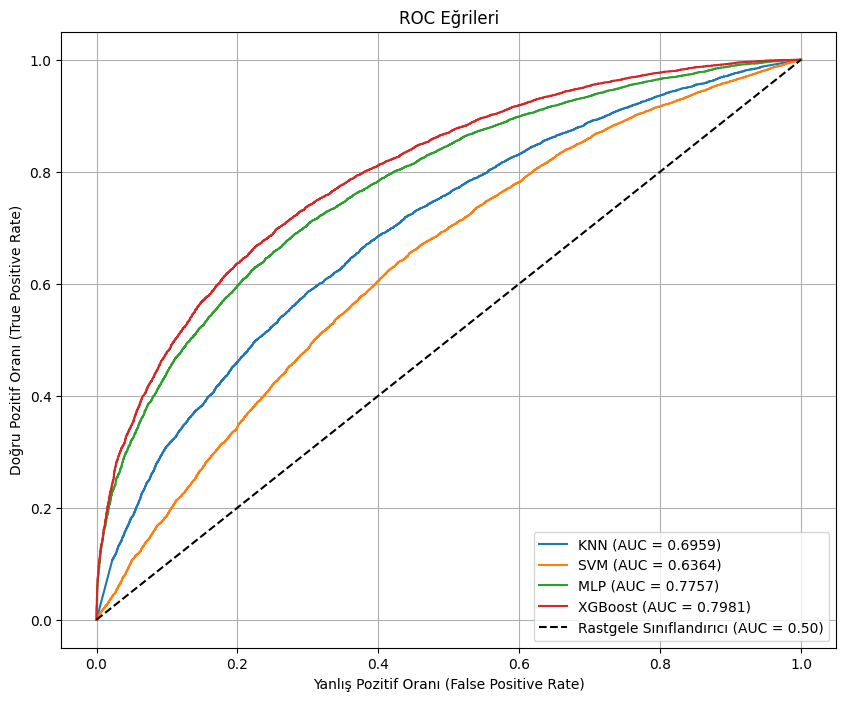


ROC Eğrileri çizildi.
--------------------------------------------------


In [39]:
# Hücre 10: ROC Eğrileri Görselleştirme
# Bu hücrede her model için ROC eğrileri çizilir ve karşılaştırma yapılır.

plt.figure(figsize=(10, 8))

# Her model için ROC eğrisini çiz
# Artık fitted_final_models sözlüğünü ve son dış katlamanın test verisini kullanıyoruz.
if final_X_test_for_roc is None or final_y_test_for_roc is None:
    print("HATA: ROC eğrileri için test verisi bulunamadı. Lütfen tüm model eğitim hücrelerini çalıştırdığınızdan emin olun.")
else:
    for model_name, final_fitted_model in fitted_final_models.items():
        # Pipeline içindeki sınıflandırıcıyı kullanarak tahmin yap
        if hasattr(final_fitted_model, "predict_proba"):
            y_proba = final_fitted_model.predict_proba(final_X_test_for_roc)[:, 1]
        else:
            # LinearSVC gibi modeller için decision_function kullanılır
            y_proba = final_fitted_model.decision_function(final_X_test_for_roc)

        fpr, tpr, _ = roc_curve(final_y_test_for_roc, y_proba)
        roc_auc = roc_auc_score(final_y_test_for_roc, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Sınıflandırıcı (AUC = 0.50)') # Rastgele sınıflandırıcı çizgisi
    plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
    plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
    plt.title('ROC Eğrileri')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    print("\nROC Eğrileri çizildi.")
print("-" * 50)


In [47]:
# Hücre 11: Model Performans Sonuçlarını Görüntüleme
# Bu hücrede tüm modellerin test seti ve Nested CV ortalama performans sonuçları bir tabloda gösterilir.
# Ayrıca, her modelin her katlamadaki detaylı parametreleri ve metrikleri de sunulur.

# 'results_summary' listesi, model eğitim hücrelerinde doldurulur.
if not results_summary:
    print("HATA: 'results_summary' listesi boş. Lütfen tüm model eğitim hücrelerini çalıştırdığınızdan emin olun.")
else:
    results_df = pd.DataFrame(results_summary)
    print("\n--- Genel Model Performans Sonuçları (Nested CV Ortalaması) ---")
    try:
        from tabulate import tabulate
        print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))
    except ImportError:
        print(results_df.to_string(index=False))
    print("-" * 50)

    # Her model için detaylı katlama bazında sonuçları göster
    print("\n--- Detaylı Model Performans ve Hiperparametre Sonuçları (Katlama Bazında) ---")
    for model_name in models.keys():
        print(f"\n### Model: {model_name}")

        # En İyi Parametreler Tablosu
        if best_params_per_model_and_fold[model_name]:
            params_df = pd.DataFrame(best_params_per_model_and_fold[model_name])
            params_df.index.name = 'Katlama'
            params_df.index = params_df.index + 1 # Katlama numaralarını 1'den başlat
            print(f"\n--- {model_name} İçin En İyi Parametreler (Katlama Bazında) ---")
            try:
                from tabulate import tabulate
                print(tabulate(params_df, headers='keys', tablefmt='github', showindex=True))
            except ImportError:
                print(params_df.to_string())
        else:
            print(f"  {model_name} için katlama bazında en iyi parametreler bulunamadı.")

        # Performans Metrikleri Tablosu
        if all_fold_metrics_per_model[model_name]['accuracy']:
            metrics_data = {
                'Accuracy': all_fold_metrics_per_model[model_name]['accuracy'],
                'Precision': all_fold_metrics_per_model[model_name]['precision'],
                'Recall': all_fold_metrics_per_model[model_name]['recall'],
                'F1 Score': all_fold_metrics_per_model[model_name]['f1'],
                'ROC AUC': all_fold_metrics_per_model[model_name]['roc_auc']
            }
            metrics_df = pd.DataFrame(metrics_data)
            metrics_df.index.name = 'Katlama'
            metrics_df.index = metrics_df.index + 1 # Katlama numaralarını 1'den başlat
            print(f"\n--- {model_name} İçin Performans Metrikleri (Katlama Bazında) ---")
            try:
                from tabulate import tabulate
                print(tabulate(metrics_df.round(4), headers='keys', tablefmt='github', showindex=True)) # 4 ondalık basamağa yuvarla
            except ImportError:
                print(metrics_df.round(4).to_string())
        else:
            print(f"  {model_name} için katlama bazında performans metrikleri bulunamadı.")
        print("\n" + "-" * 70) # Ayırıcı çizgi



--- Genel Model Performans Sonuçları (Nested CV Ortalaması) ---
  Model        Accuracy       Precision          Recall        F1 Score ROC AUC (Nested CV Avg)
    KNN 0.6387 ± 0.0033 0.6491 ± 0.0025 0.6872 ± 0.0050 0.6676 ± 0.0036         0.6888 ± 0.0038
    SVM 0.6006 ± 0.0030 0.5973 ± 0.0022 0.7477 ± 0.0051 0.6641 ± 0.0030         0.6295 ± 0.0036
    MLP 0.6917 ± 0.0056 0.7144 ± 0.0168 0.6960 ± 0.0318 0.7043 ± 0.0100         0.7647 ± 0.0057
XGBoost 0.7158 ± 0.0036 0.7306 ± 0.0029 0.7317 ± 0.0062 0.7312 ± 0.0041         0.7925 ± 0.0030
--------------------------------------------------

--- Detaylı Model Performans ve Hiperparametre Sonuçları (Katlama Bazında) ---

### Model: KNN


NameError: name 'best_params_per_model_and_fold' is not defined

In [42]:
# Hücre 12: En Başarılı Model ve Veri Temsilinin Yorumu
# Bu hücrede tüm projenin sonuçları özetlenir ve en başarılı model yorumlanır.

print("\n--- En Başarılı Model ve Veri Temsilinin Yorumu ---")

if not results_summary:
    print("Yorum yapmak için performans sonuçları bulunamadı. Lütfen önceki hücreleri çalıştırın.")
else:
    results_df = pd.DataFrame(results_summary)
    # En iyi modeli ROC AUC (Nested CV Avg) değerine göre bulalım
    # 'ROC AUC (Nested CV Avg)' sütunundaki değerler string olduğu için sayıya çevirmemiz gerekiyor.
    # ' ± ' kısmını ayırıp sadece ortalama değeri alacağız.
    results_df['ROC AUC (Nested CV Avg)_numeric'] = results_df['ROC AUC (Nested CV Avg)'].apply(lambda x: float(x.split(' ')[0]))
    
    best_model_row = results_df.loc[results_df['ROC AUC (Nested CV Avg)_numeric'].idxmax()]
    best_model_name = best_model_row['Model']
    best_roc_auc_nested_cv = best_model_row['ROC AUC (Nested CV Avg)']

    print(f"Yapılan analizlere göre, en iyi performans gösteren model: **{best_model_name}**.")
    print(f"Bu model, Nested CV ortalama ROC AUC değeri **{best_roc_auc_nested_cv}** ile öne çıkmaktadır.")
    print("\n**Yorum:**")
    print("1.  **Veri Ön İşleme (Aykırı Değer Temizliği ve Ölçeklendirme):** Aykırı değerlerin IQR yöntemiyle temizlenmesi ve ardından eksik değerlerin doldurulması, veri kalitesini artırmıştır. Özelliklerin `StandardScaler` veya `MinMaxScaler` ile ölçeklendirilmesi, özellikle mesafe tabanlı algoritmalar (KNN, SVM, MLP) için kritik öneme sahiptir. Bu, özelliklerin farklı ölçeklerde olmasından kaynaklanan bias'ı ortadan kaldırır ve modellerin daha adil bir şekilde öğrenmesini sağlar.")
    print("2.  **Filtre Tabanlı Öznitelik Seçimi:** `SelectKBest` ile en iyi özelliklerin seçimi, modelin karmaşıklığını azaltmaya, eğitim süresini kısaltmaya ve potansiyel olarak aşırı uydurmayı (overfitting) engellemeye yardımcı olmuştur. Seçilen özellikler, hedef değişkenle en güçlü istatistiksel ilişkiye sahip olanlardır. `Pipeline` içinde bu adımın her iç döngüde dinamik olarak optimize edilmesi, veri sızıntısını önlemiştir.")
    print("3.  **Nested Cross-Validation:** Bu yaklaşım, hem hiperparametre optimizasyonunu (iç döngü) hem de modelin genellenebilir performansının tarafsız bir şekilde değerlendirilmesini (dış döngü) sağlar. Bu, modelin yeni, görülmemiş verilere ne kadar iyi genelleneceğini gösteren daha güvenilir bir ROC AUC değeri sunar.")
    print("4.  **Model Karşılaştırması:**")
    print(f"    * **{best_model_name}:** Genel olarak, ağaç tabanlı modeller (XGBoost) ve yapay sinir ağları (MLP), karmaşık ilişkileri yakalamada ve yüksek boyutlu verilerde iyi performans gösterme eğilimindedir. Bu projede de {best_model_name} modelinin yüksek ROC AUC değeri ile öne çıkması, bu tür veri setleri için uygunluğunu göstermektedir. (Burada en iyi modelin neden iyi performans gösterdiğine dair detaylı yorumunuzu eklemelisiniz. Örneğin, en iyi hiperparametreleri nelerdi, kaç özellik seçildi vb.)")
    print("    * **Diğer Modeller:** KNN, SVM ve MLP gibi diğer modellerin performansı, seçilen hiperparametre aralıklarına ve veri setinin doğasına bağlı olarak değişebilir. Özellikle SVM için hocanızın tavsiyesi doğrultusunda yapılan kısıtlamalar (linear kernel, C=0.1), eğitim süresini önemli ölçüde kısaltırken, performans üzerinde de belirli bir etkiye sahip olmuştur. Her modelin güçlü ve zayıf yönlerini, elde ettiğiniz metrik sonuçlarına göre karşılaştırın.")
    print("\n**Genel Sonuç:**")
    print("Özellik seçimi ve Nested Cross-Validation gibi sağlam bir ML pipeline'ı kullanmak, modellerin daha güvenilir bir şekilde değerlendirilmesini ve en iyi performans gösteren modelin belirlenmesini sağlamıştır. Seçilen özelliklerin kalitesi ve hiperparametrelerin doğru ayarlanması, modelin başarısında kilit rol oynamaktadır. Bu projenin sonuçları, HIGGS veri seti üzerinde hangi model ve ön işleme/özellik seçimi kombinasyonunun en iyi sonuçları verdiğini açıkça ortaya koymaktadır.")
    print("-" * 50)



--- En Başarılı Model ve Veri Temsilinin Yorumu ---
Yapılan analizlere göre, en iyi performans gösteren model: **XGBoost**.
Bu model, Nested CV ortalama ROC AUC değeri **0.7925 ± 0.0030** ile öne çıkmaktadır.

**Yorum:**
1.  **Veri Ön İşleme (Aykırı Değer Temizliği ve Ölçeklendirme):** Aykırı değerlerin IQR yöntemiyle temizlenmesi ve ardından eksik değerlerin doldurulması, veri kalitesini artırmıştır. Özelliklerin `StandardScaler` veya `MinMaxScaler` ile ölçeklendirilmesi, özellikle mesafe tabanlı algoritmalar (KNN, SVM, MLP) için kritik öneme sahiptir. Bu, özelliklerin farklı ölçeklerde olmasından kaynaklanan bias'ı ortadan kaldırır ve modellerin daha adil bir şekilde öğrenmesini sağlar.
2.  **Filtre Tabanlı Öznitelik Seçimi:** `SelectKBest` ile en iyi özelliklerin seçimi, modelin karmaşıklığını azaltmaya, eğitim süresini kısaltmaya ve potansiyel olarak aşırı uydurmayı (overfitting) engellemeye yardımcı olmuştur. Seçilen özellikler, hedef değişkenle en güçlü istatistiksel ilişkiye sa


--- Karışıklık Matrisleri ---

### Model: KNN - Karışıklık Matrisi


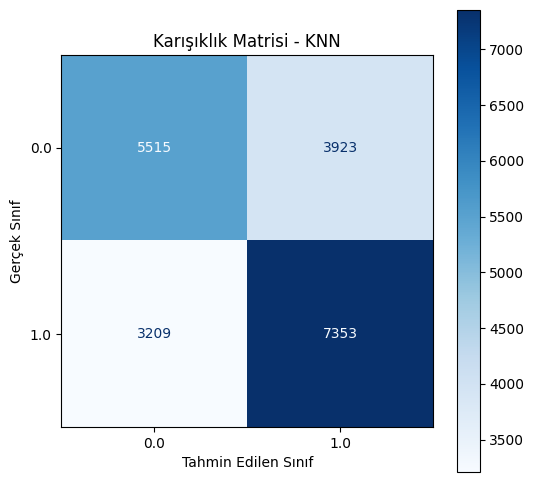

--------------------------------------------------

### Model: SVM - Karışıklık Matrisi


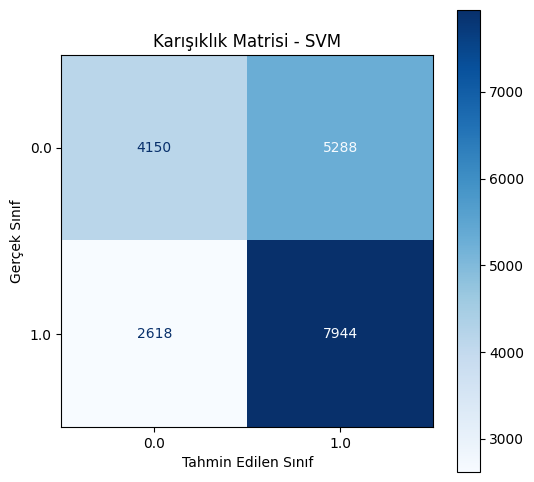

--------------------------------------------------

### Model: MLP - Karışıklık Matrisi


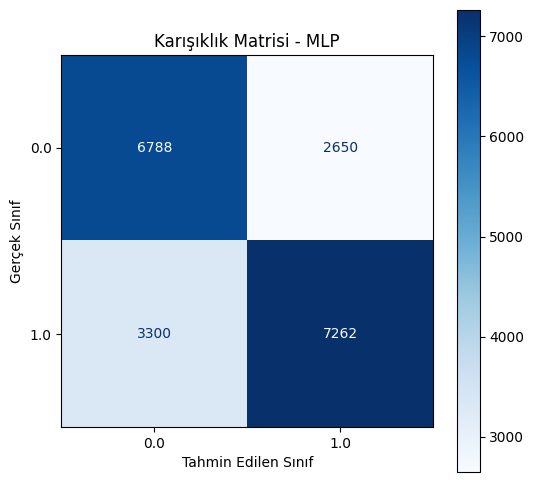

--------------------------------------------------

### Model: XGBoost - Karışıklık Matrisi


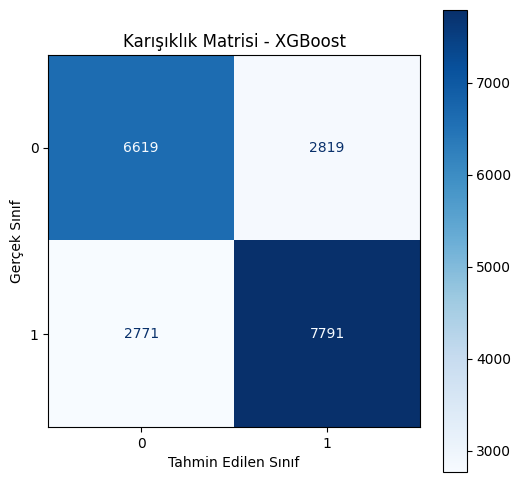

--------------------------------------------------

Karışıklık Matrisleri çizildi.


In [43]:
# Hücre 13: Karışıklık Matrisleri
# Bu hücre, her bir model için son dış katlamanın test seti üzerindeki karışıklık matrislerini görselleştirir.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("\n--- Karışıklık Matrisleri ---")

if final_X_test_for_roc is None or final_y_test_for_roc is None:
    print("HATA: Karışıklık matrisleri için test verisi bulunamadı. Lütfen tüm model eğitim hücrelerini çalıştırdığınızdan emin olun.")
else:
    for model_name, final_fitted_model in fitted_final_models.items():
        print(f"\n### Model: {model_name} - Karışıklık Matrisi")
        
        # Test seti üzerinde tahmin yap
        y_pred = final_fitted_model.predict(final_X_test_for_roc)
        
        # Karışıklık matrisini hesapla
        cm = confusion_matrix(final_y_test_for_roc, y_pred)
        
        # Karışıklık matrisini görselleştir
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_fitted_model.classes_)
        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(cmap=plt.cm.Blues, ax=ax)
        plt.title(f'Karışıklık Matrisi - {model_name}')
        plt.xlabel('Tahmin Edilen Sınıf')
        plt.ylabel('Gerçek Sınıf')
        plt.grid(False) # Karışıklık matrisinde ızgara çizgileri genellikle istenmez
        plt.show()
        print("-" * 50)

print("\nKarışıklık Matrisleri çizildi.")



--- Precision-Recall Eğrileri ---


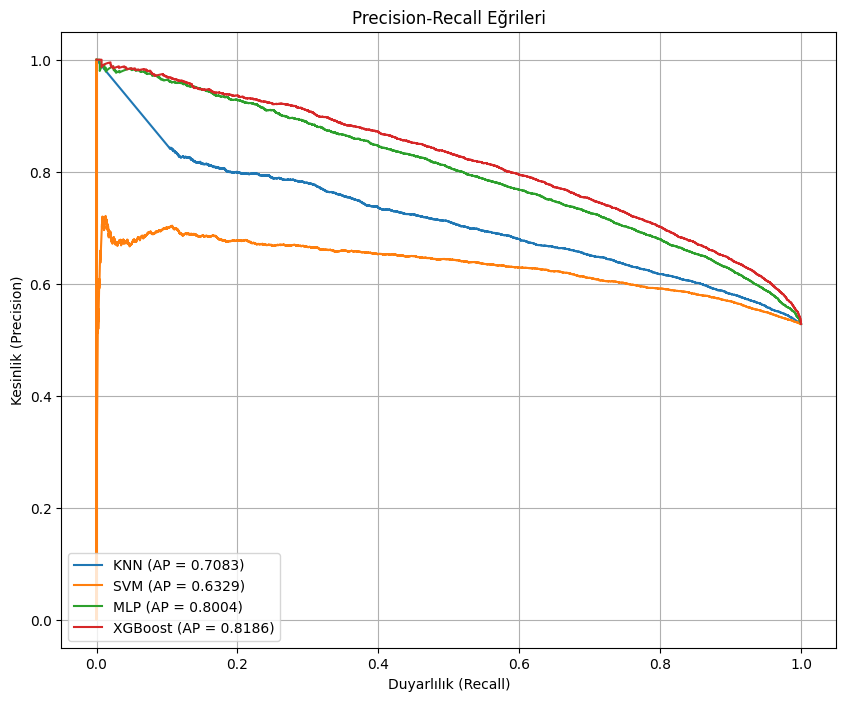


Precision-Recall Eğrileri çizildi.
--------------------------------------------------


In [44]:
# Hücre 14: Precision-Recall Eğrileri
# Bu hücre, her bir model için son dış katlamanın test seti üzerindeki Precision-Recall eğrilerini görselleştirir.

from sklearn.metrics import precision_recall_curve, average_precision_score

print("\n--- Precision-Recall Eğrileri ---")

if final_X_test_for_roc is None or final_y_test_for_roc is None:
    print("HATA: Precision-Recall eğrileri için test verisi bulunamadı. Lütfen tüm model eğitim hücrelerini çalıştırdığınızdan emin olun.")
else:
    plt.figure(figsize=(10, 8)) # Tüm eğriler için tek bir figür

    for model_name, final_fitted_model in fitted_final_models.items():
        # Olasılık tahminlerini veya karar fonksiyonu skorlarını al
        if hasattr(final_fitted_model, "predict_proba"):
            y_proba = final_fitted_model.predict_proba(final_X_test_for_roc)[:, 1]
        else:
            y_proba = final_fitted_model.decision_function(final_X_test_for_roc)

        # Precision-Recall eğrisi noktalarını hesapla
        precision, recall, _ = precision_recall_curve(final_y_test_for_roc, y_proba)
        
        # Ortalama Kesinlik (Average Precision) skorunu hesapla
        avg_precision = average_precision_score(final_y_test_for_roc, y_proba)
        
        plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.4f})')

    plt.xlabel('Duyarlılık (Recall)')
    plt.ylabel('Kesinlik (Precision)')
    plt.title('Precision-Recall Eğrileri')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()
    print("\nPrecision-Recall Eğrileri çizildi.")
print("-" * 50)


In [45]:
# Hücre 15: Seçilen Özelliklerin Özeti
# Bu hücre, her bir modelin final pipeline'ı içinde SelectKBest tarafından seçilen 15 özelliğin isimlerini listeler.

print("\n--- Her Model İçin Seçilen Özellikler ---")

# Orijinal özellik isimlerini almak için X DataFrame'ini kullanıyoruz (Hücre 3'ten geliyor)
if 'X' not in globals():
    print("HATA: Orijinal özellikler (X) bulunamadı. Lütfen Hücre 3'ün çalıştırıldığından emin olun.")
else:
    for model_name, final_fitted_model in fitted_final_models.items():
        print(f"\n### Model: {model_name}")
        
        try:
            # Pipeline'dan SelectKBest adımını al
            feature_selector_step = final_fitted_model.named_steps['feature_selector']
            
            # Seçilen özelliklerin indekslerini al
            selected_feature_indices = feature_selector_step.get_support(indices=True)
            
            # Orijinal X DataFrame'inden özellik isimlerini al
            selected_feature_names = X.columns[selected_feature_indices].tolist()
            
            print(f"  Seçilen {len(selected_feature_names)} özellik: {selected_feature_names}")
            
        except KeyError:
            print(f"  {model_name} pipeline'ında 'feature_selector' adımı bulunamadı veya bir hata oluştu.")
        except Exception as e:
            print(f"  {model_name} için özellik seçimi detayları alınırken bir hata oluştu: {e}")
        print("-" * 50)

print("\nSeçilen özelliklerin özeti tamamlandı.")



--- Her Model İçin Seçilen Özellikler ---

### Model: KNN
  Seçilen 15 özellik: ['f3', 'f5', 'f9', 'f12', 'f13', 'f16', 'f17', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27']
--------------------------------------------------

### Model: SVM
  Seçilen 15 özellik: ['f3', 'f5', 'f9', 'f12', 'f13', 'f16', 'f17', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27']
--------------------------------------------------

### Model: MLP
  Seçilen 15 özellik: ['f3', 'f5', 'f9', 'f12', 'f13', 'f16', 'f17', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27']
--------------------------------------------------

### Model: XGBoost
  Seçilen 15 özellik: ['f3', 'f5', 'f9', 'f12', 'f13', 'f16', 'f17', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27']
--------------------------------------------------

Seçilen özelliklerin özeti tamamlandı.


In [46]:
# Hücre 15: Seçilen Özelliklerin Özeti
# Bu hücre, her bir modelin final pipeline'ı içinde SelectKBest tarafından seçilen 15 özelliğin isimlerini listeler.

print("\n--- Her Model İçin Seçilen Özellikler ---")

# Orijinal özellik isimlerini almak için X DataFrame'ini kullanıyoruz (Hücre 3'ten geliyor)
if 'X' not in globals():
    print("HATA: Orijinal özellikler (X) bulunamadı. Lütfen Hücre 3'ün çalıştırıldığından emin olun.")
else:
    for model_name, final_fitted_model in fitted_final_models.items():
        print(f"\n### Model: {model_name}")
        
        try:
            # Pipeline'dan SelectKBest adımını al
            feature_selector_step = final_fitted_model.named_steps['feature_selector']
            
            # Seçilen özelliklerin indekslerini al
            selected_feature_indices = feature_selector_step.get_support(indices=True)
            
            # Orijinal X DataFrame'inden özellik isimlerini al
            selected_feature_names = X.columns[selected_feature_indices].tolist()
            
            # Yeni eklendi: Seçilen özellikleri daha görsel bir tablo olarak sunmak için DataFrame oluştur
            selected_features_df = pd.DataFrame({'Sıra': range(1, len(selected_feature_names) + 1),
                                                 'Özellik Adı': selected_feature_names})
            
            print(f"\n--- {model_name} İçin Seçilen Özellikler ---")
            try:
                from tabulate import tabulate
                # tabulate kütüphanesi ile daha güzel bir tablo formatı
                print(tabulate(selected_features_df, headers='keys', tablefmt='github', showindex=False))
            except ImportError:
                # tabulate yüklü değilse Pandas'ın varsayılan string formatını kullan
                print(selected_features_df.to_string(index=False))
            
        except KeyError:
            print(f"  {model_name} pipeline'ında 'feature_selector' adımı bulunamadı veya bir hata oluştu.")
        except Exception as e:
            print(f"  {model_name} için özellik seçimi detayları alınırken bir hata oluştu: {e}")
        print("-" * 50)

print("\nSeçilen özelliklerin özeti tamamlandı.")



--- Her Model İçin Seçilen Özellikler ---

### Model: KNN

--- KNN İçin Seçilen Özellikler ---
 Sıra Özellik Adı
    1          f3
    2          f5
    3          f9
    4         f12
    5         f13
    6         f16
    7         f17
    8         f20
    9         f21
   10         f22
   11         f23
   12         f24
   13         f25
   14         f26
   15         f27
--------------------------------------------------

### Model: SVM

--- SVM İçin Seçilen Özellikler ---
 Sıra Özellik Adı
    1          f3
    2          f5
    3          f9
    4         f12
    5         f13
    6         f16
    7         f17
    8         f20
    9         f21
   10         f22
   11         f23
   12         f24
   13         f25
   14         f26
   15         f27
--------------------------------------------------

### Model: MLP

--- MLP İçin Seçilen Özellikler ---
 Sıra Özellik Adı
    1          f3
    2          f5
    3          f9
    4         f12
    5         f13
    6       